# Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Setup phases and times
times = np.linspace(0, 10, 100)

# Define the phase_cycle_component Function (Updated to use lm only)

In [3]:
def phase_cycle_component(phases, P_grid, lm):
    """
    phases: length N+1, uniform on [0, 2π] (includes 2π)
    P_grid: (N+1, N+1, T) with P(t; φ1_i, φ2_k)
    lm    : (l, m)
    returns: (T,) ≈ ∬ e^{-i(l φ1 + m φ2)} P(t; φ1, φ2) dφ1 dφ2
    """
    l, m = lm
    phases = np.asarray(phases)
    L, M, T = P_grid.shape
    assert L == M == len(phases)

    N = len(phases) - 1
    dphi = (phases[-1] - phases[0]) / N          # = 2π/N

    # trapezoid weights: 1/2 at 0 and 2π, 1 elsewhere
    w = np.ones(len(phases), float)
    w[0] = w[-1] = 0.5

    u1 = w * np.exp(-1j * l * phases)            # (N+1,)
    u2 = w * np.exp(-1j * m * phases)            # (N+1,)
    P_out = np.einsum('i,k,ikt->t', u1, u2, P_grid)  # sum over φ1, φ2

    return P_out * dphi * dphi

# Test with Constant Function 

Phases from, to, length 0.0 6.283185307179586 5


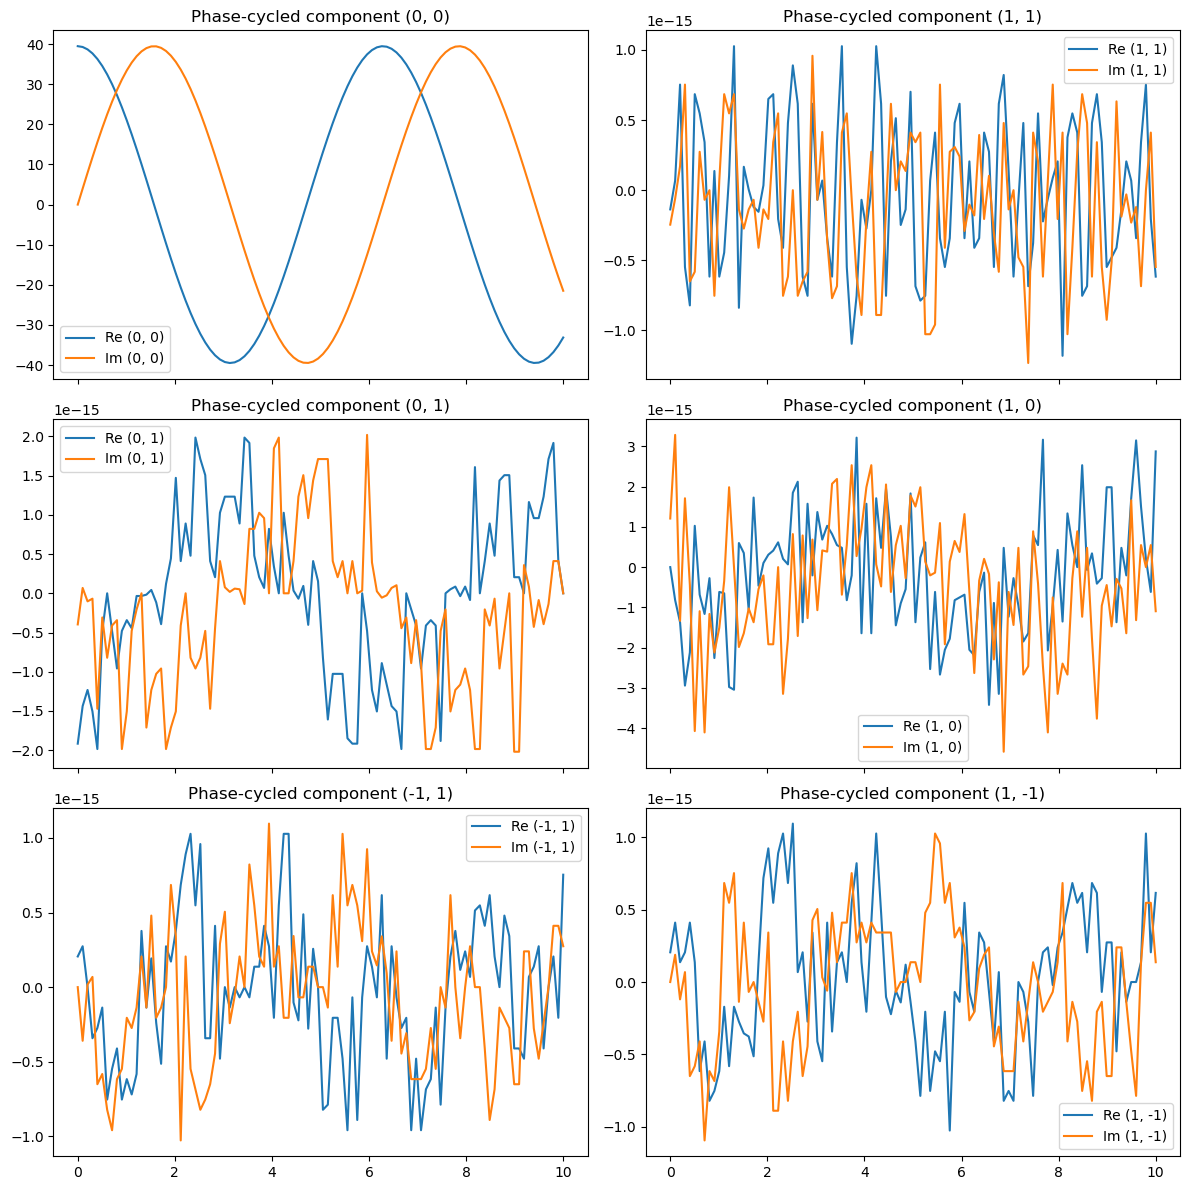

In [4]:
from qspectro2d.config.default_simulation_params import PHASE_CYCLING_PHASES as phases
# Test with function depending only on t
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(1j * w * t)

print("Phases from, to, length", phases[0], phases[-1], len(phases))
lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

Phases from, to, length 0.0 6.283185307179586 5


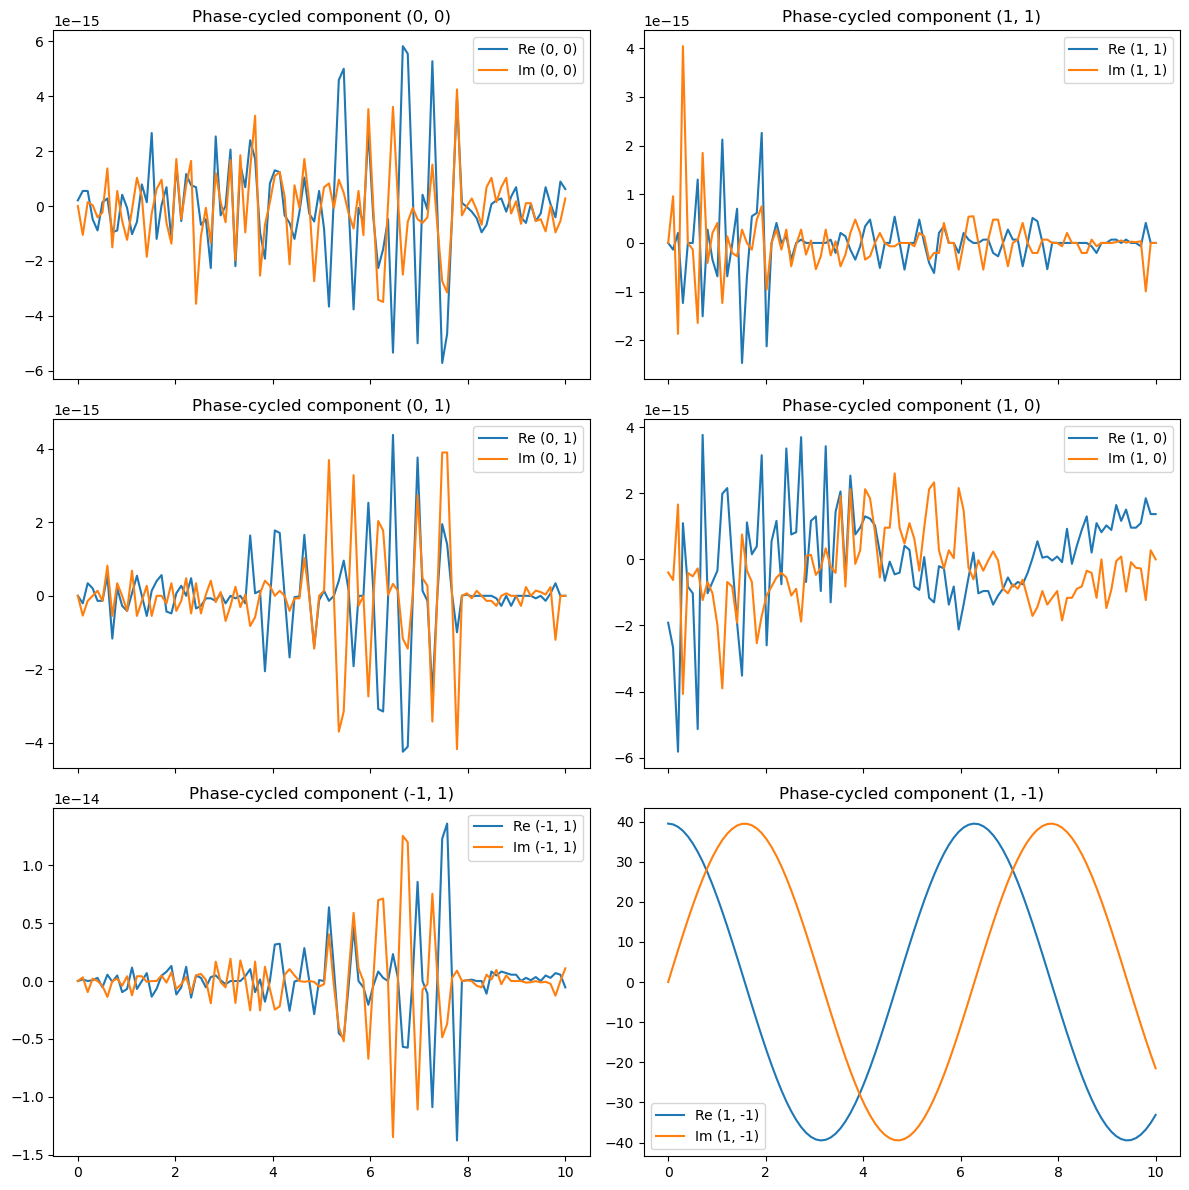

In [5]:
from qspectro2d.config.default_simulation_params import PHASE_CYCLING_PHASES as phases
# Test with function depending only on t
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for t_idx, t in enumerate(times):
    P_grid[:, :, t_idx] = np.exp(1j * w * t -  1j * phases[np.newaxis, :] + 1j * phases[:, np.newaxis])

print("Phases from, to, length", phases[0], phases[-1], len(phases))
lm_list = [(0,0), (1,1), (0,1), (1,0), (-1,1), (1,-1)]
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Linear in phi1 

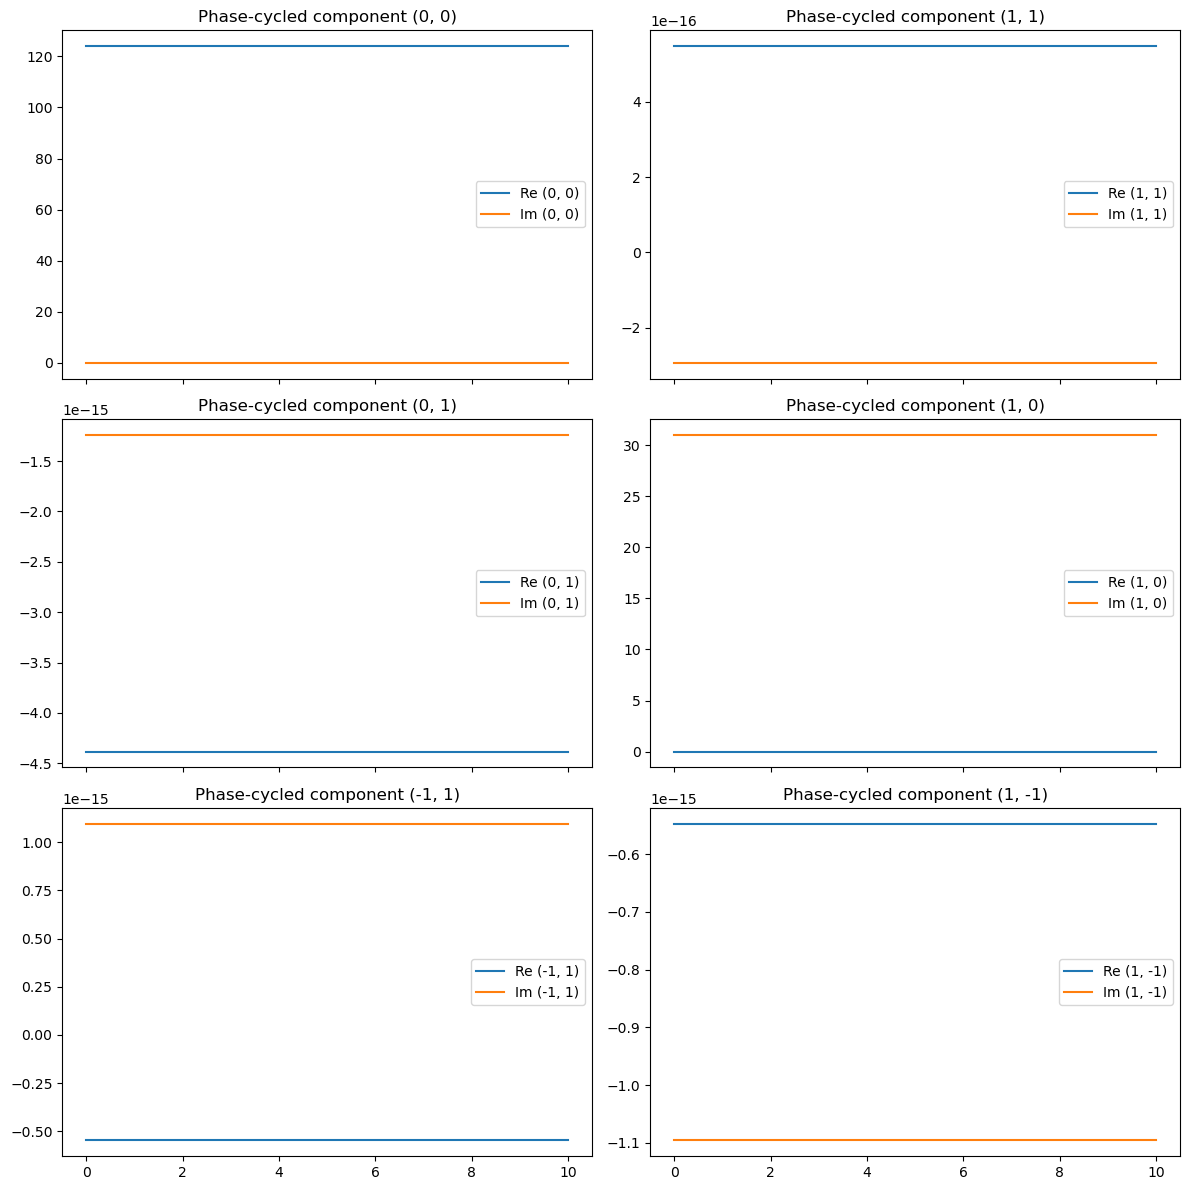

In [6]:
# Test with Linear in phi1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with Product phi1 * phi2 

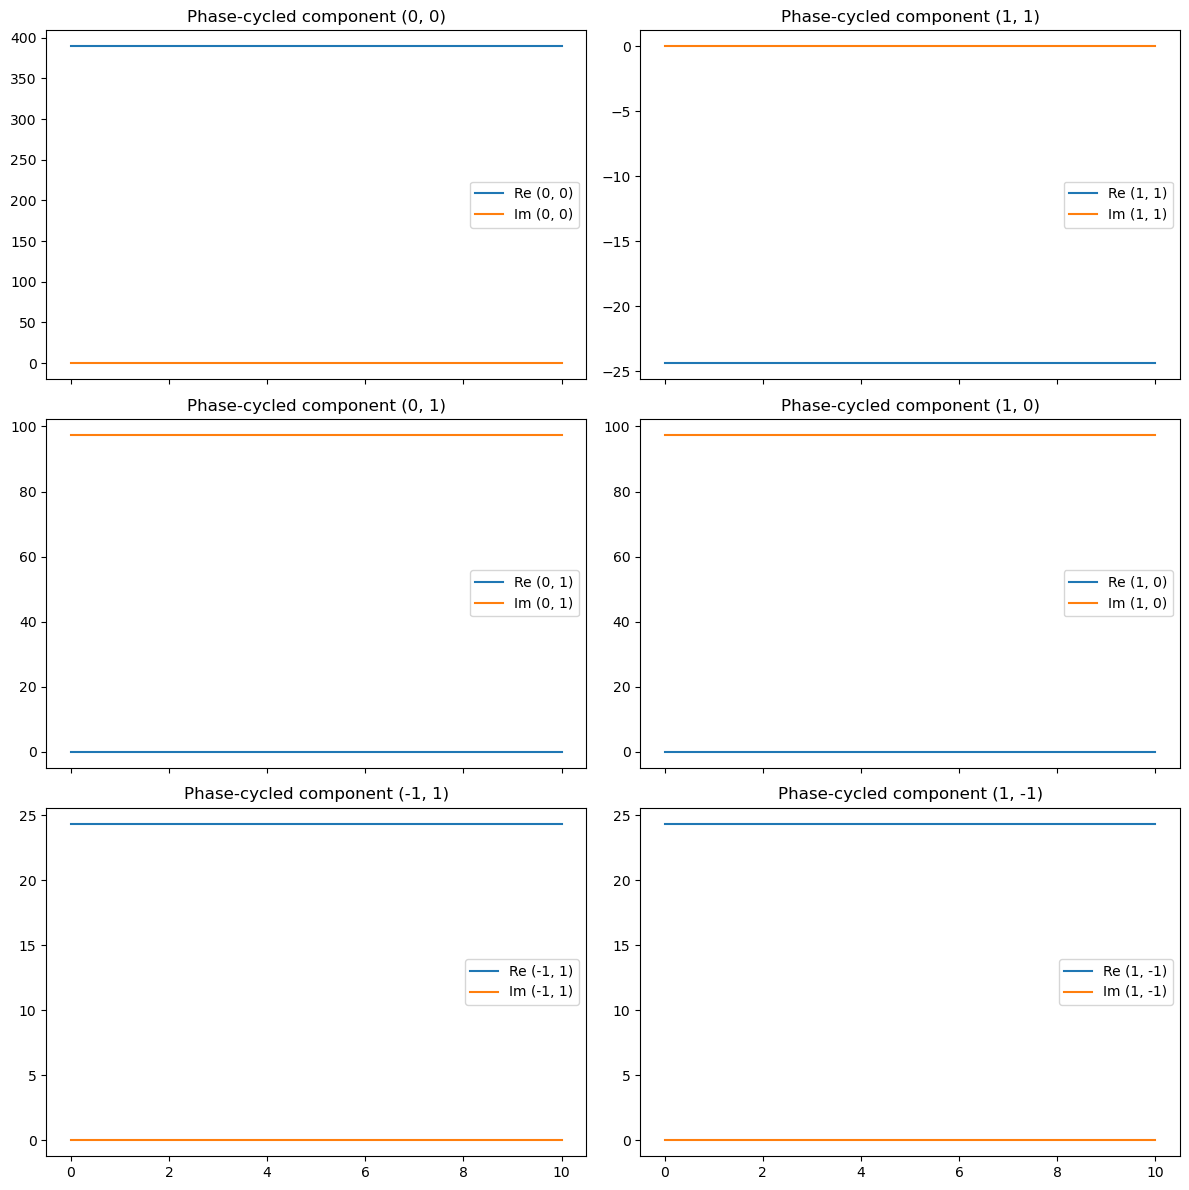

In [7]:
# Test with Product phi1 * phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = phi1 * phi2

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - w t) 

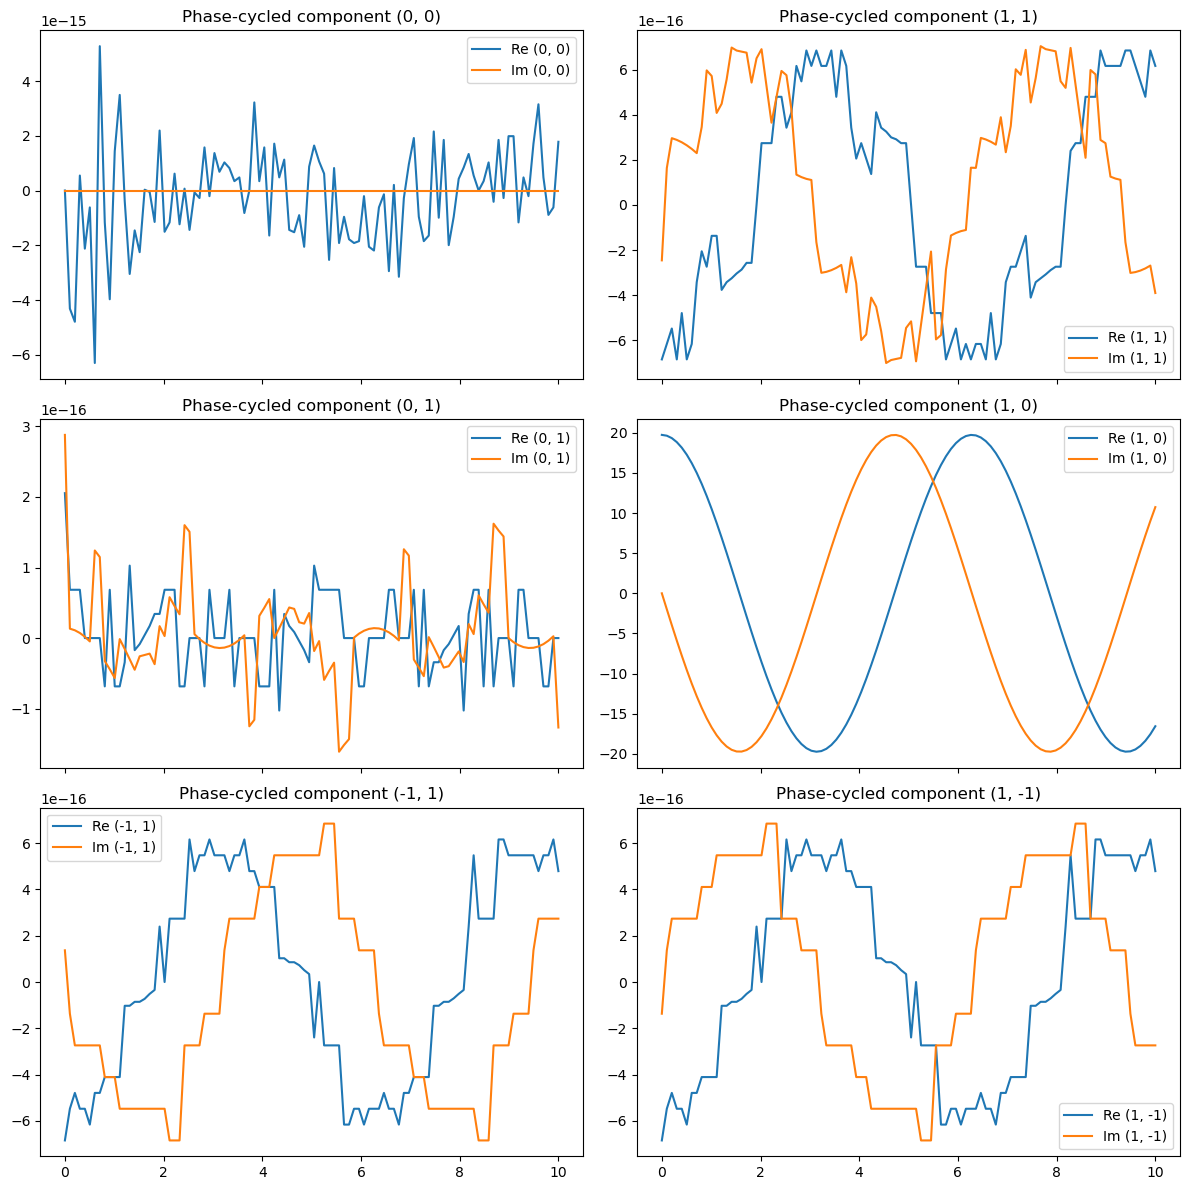

In [8]:
# Test with cos(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1 - w * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with exp(phi1 - w t) 

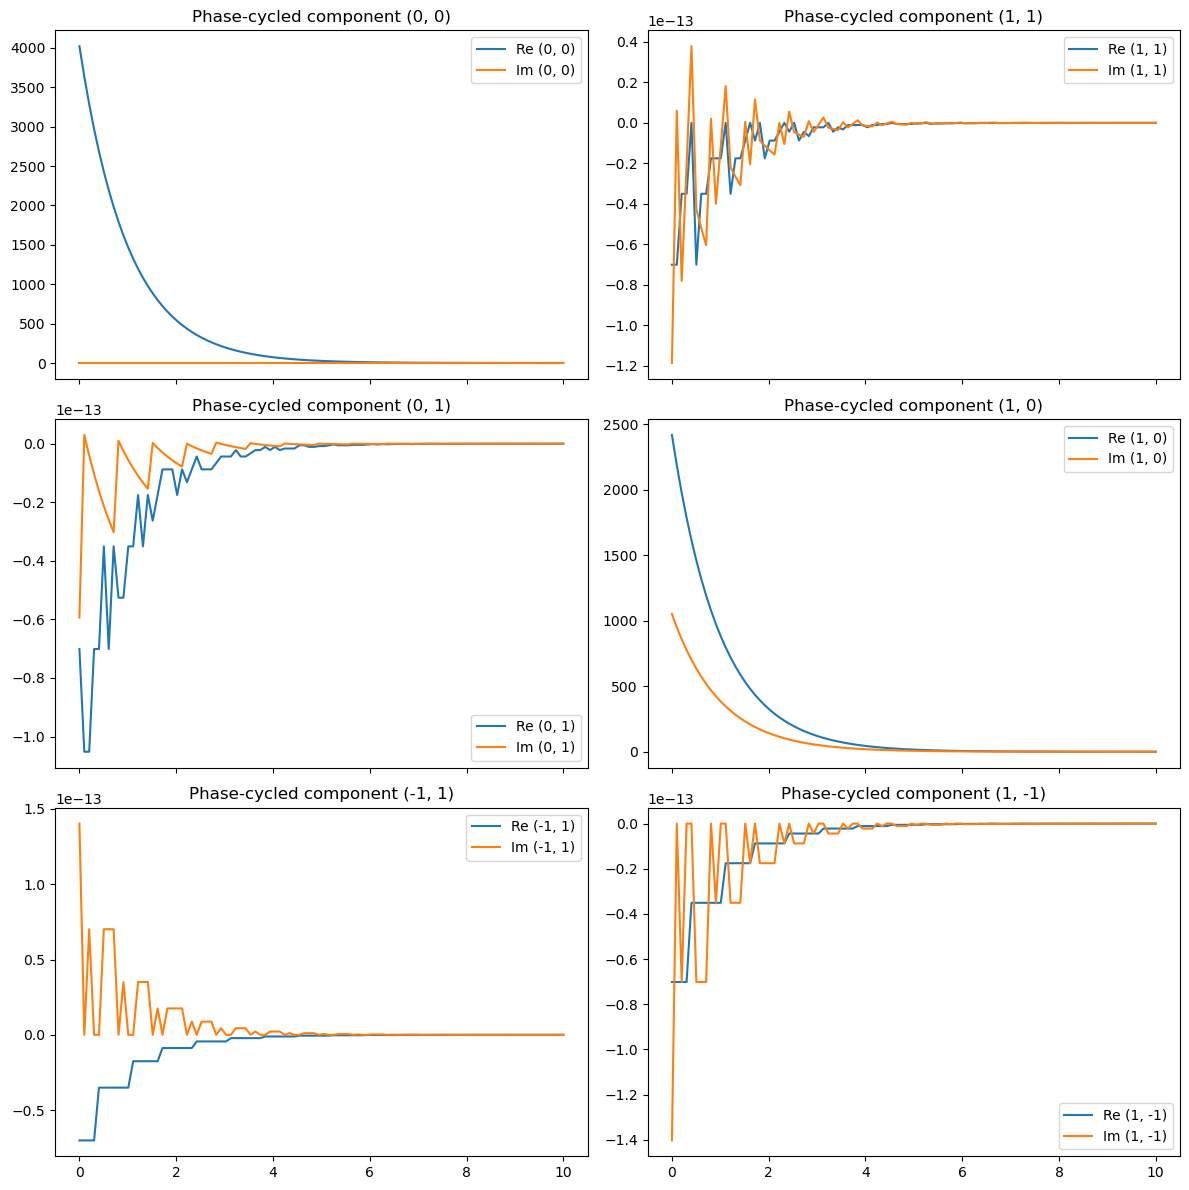

In [9]:
# Test with exp(phi1 - w t)
w = 1.0
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.exp((phi1 - w * t))

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Test with cos(phi1 - phi2)

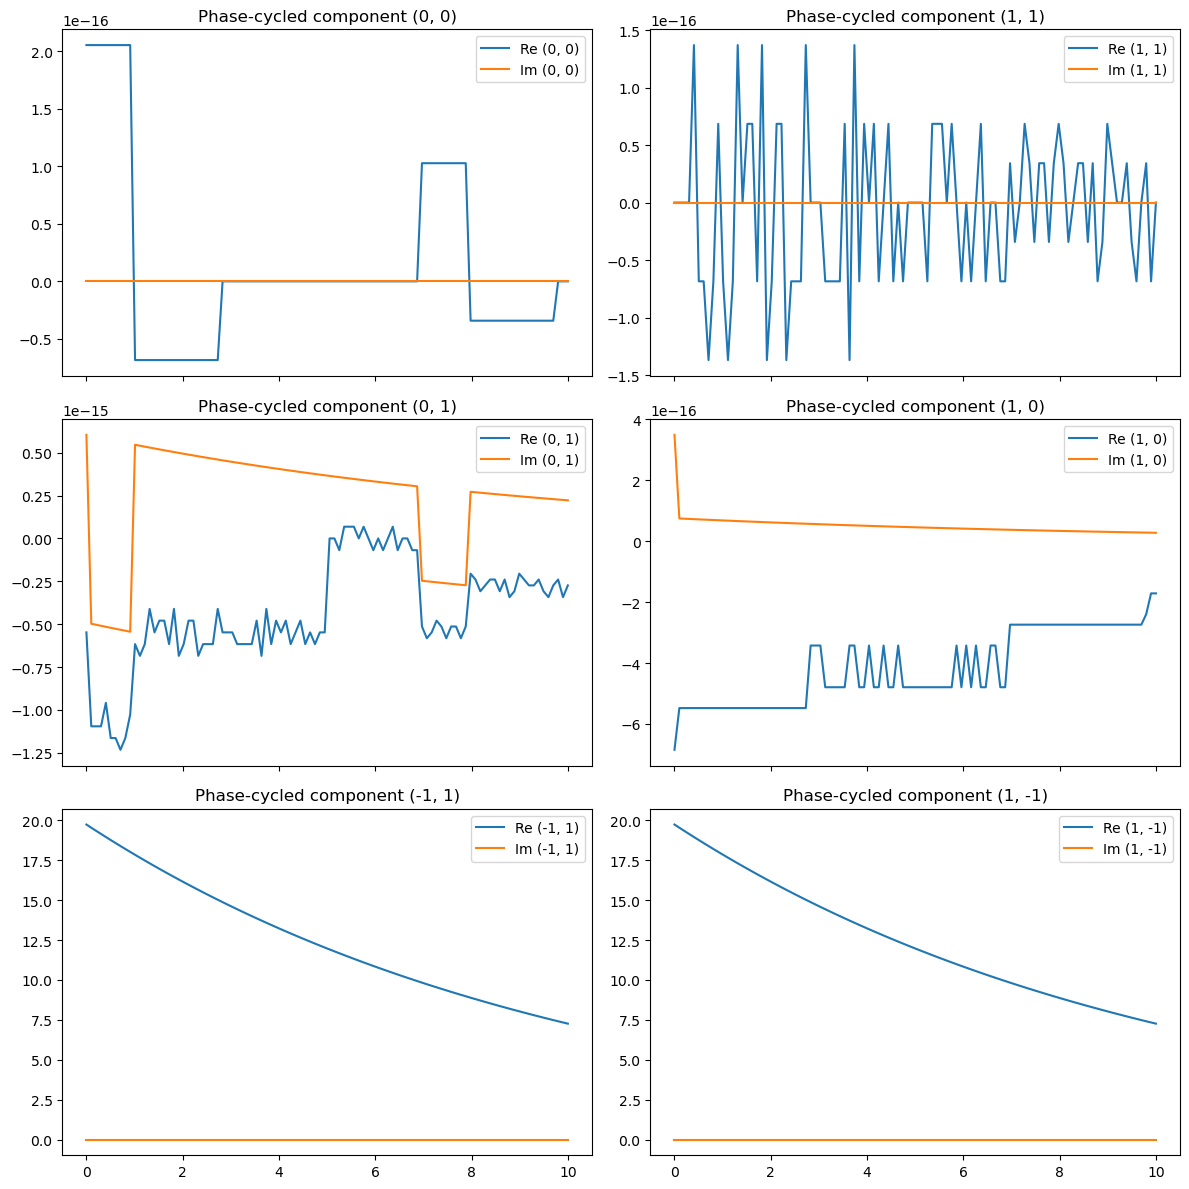

In [10]:
# Test with cos(phi1 - phi2) with exponential decay
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1  # decay rate
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(np.abs(phi1 - phi2)) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

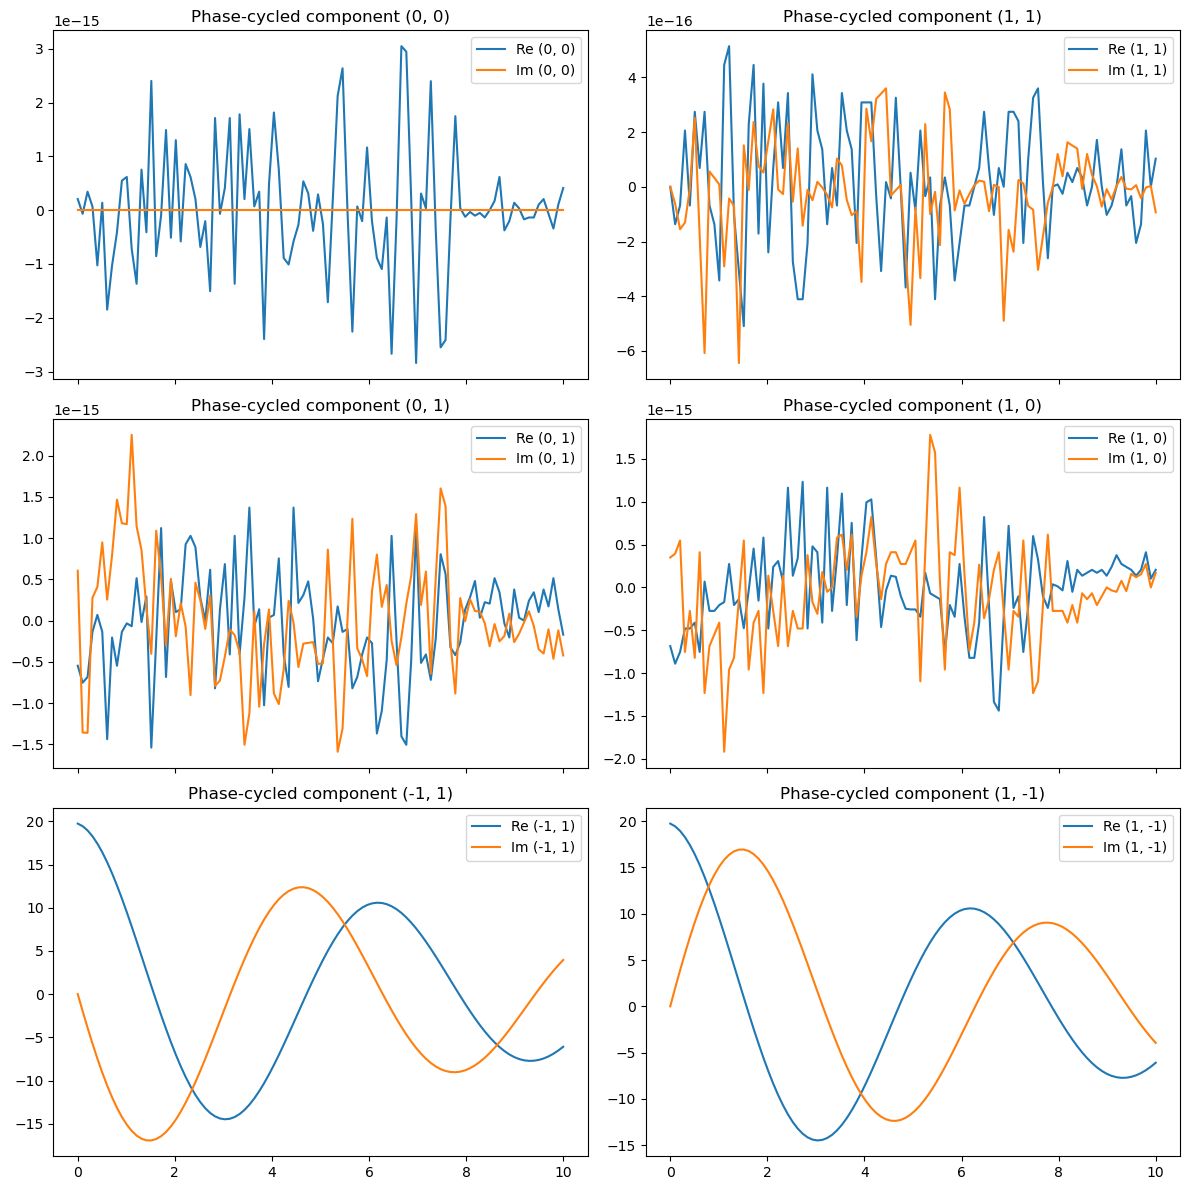

In [11]:
# Test with cos(w * t - (phi2 - phi1)) with exponential decay
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1  # decay rate
w = 1.0
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(w * t - (phi2 - phi1)) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

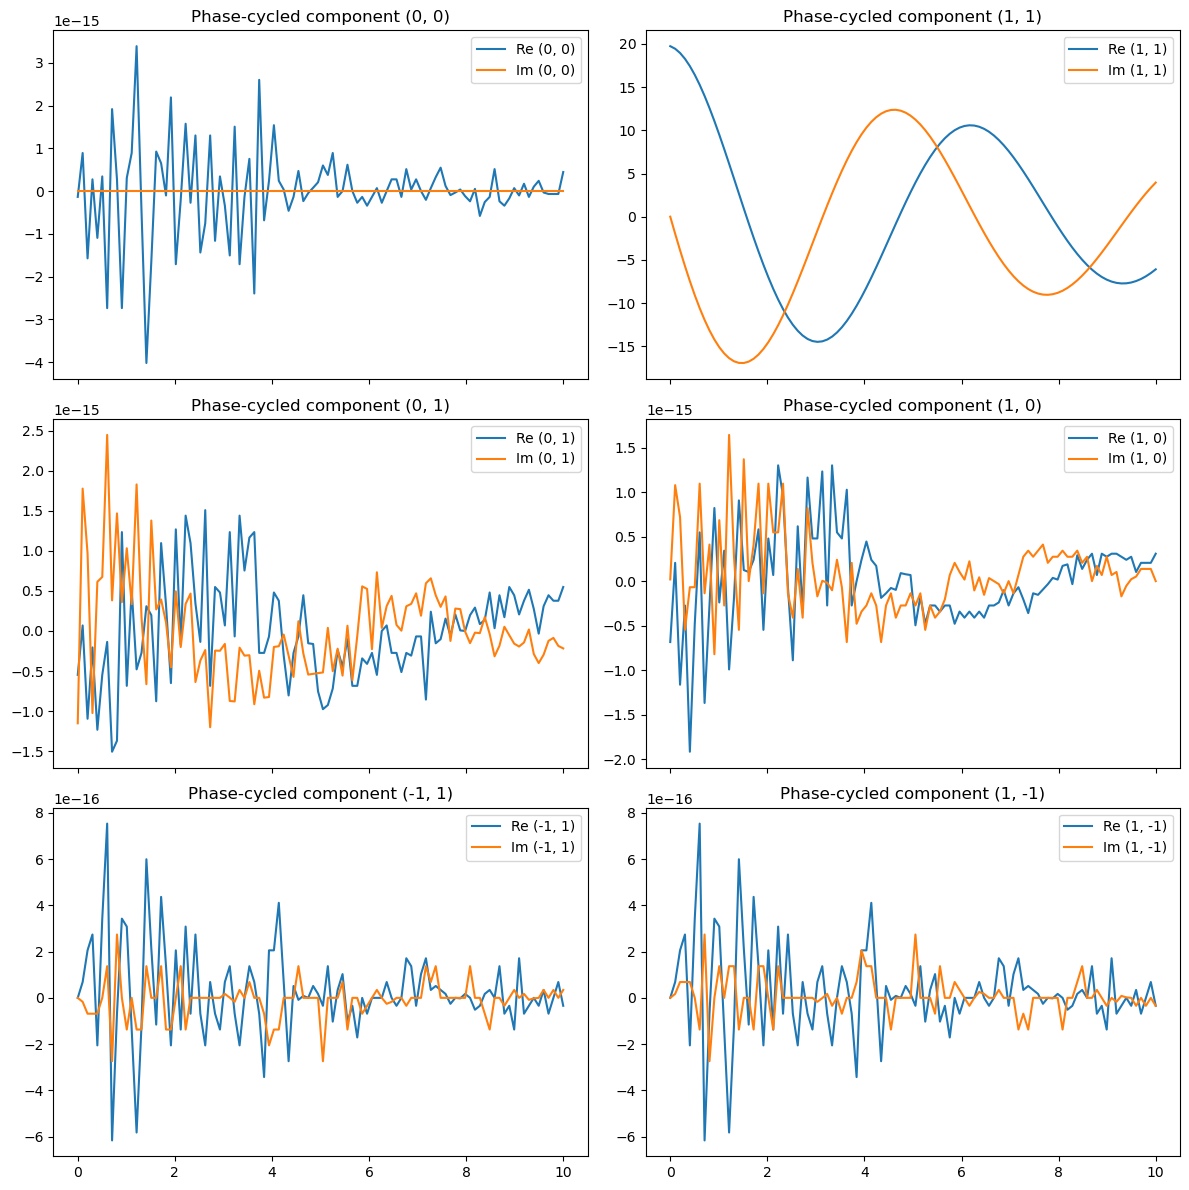

In [12]:
# Test with cos(w * t - (phi2 + phi1)) with exponential decay
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1  # decay rate
w = 1.0
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(w * t - (phi2 + phi1)) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Phase-cycled component {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

# Testing Symmetries in phi1 and phi2

## Even in phi1: f(phi1, phi2) = f(-phi1, phi2)

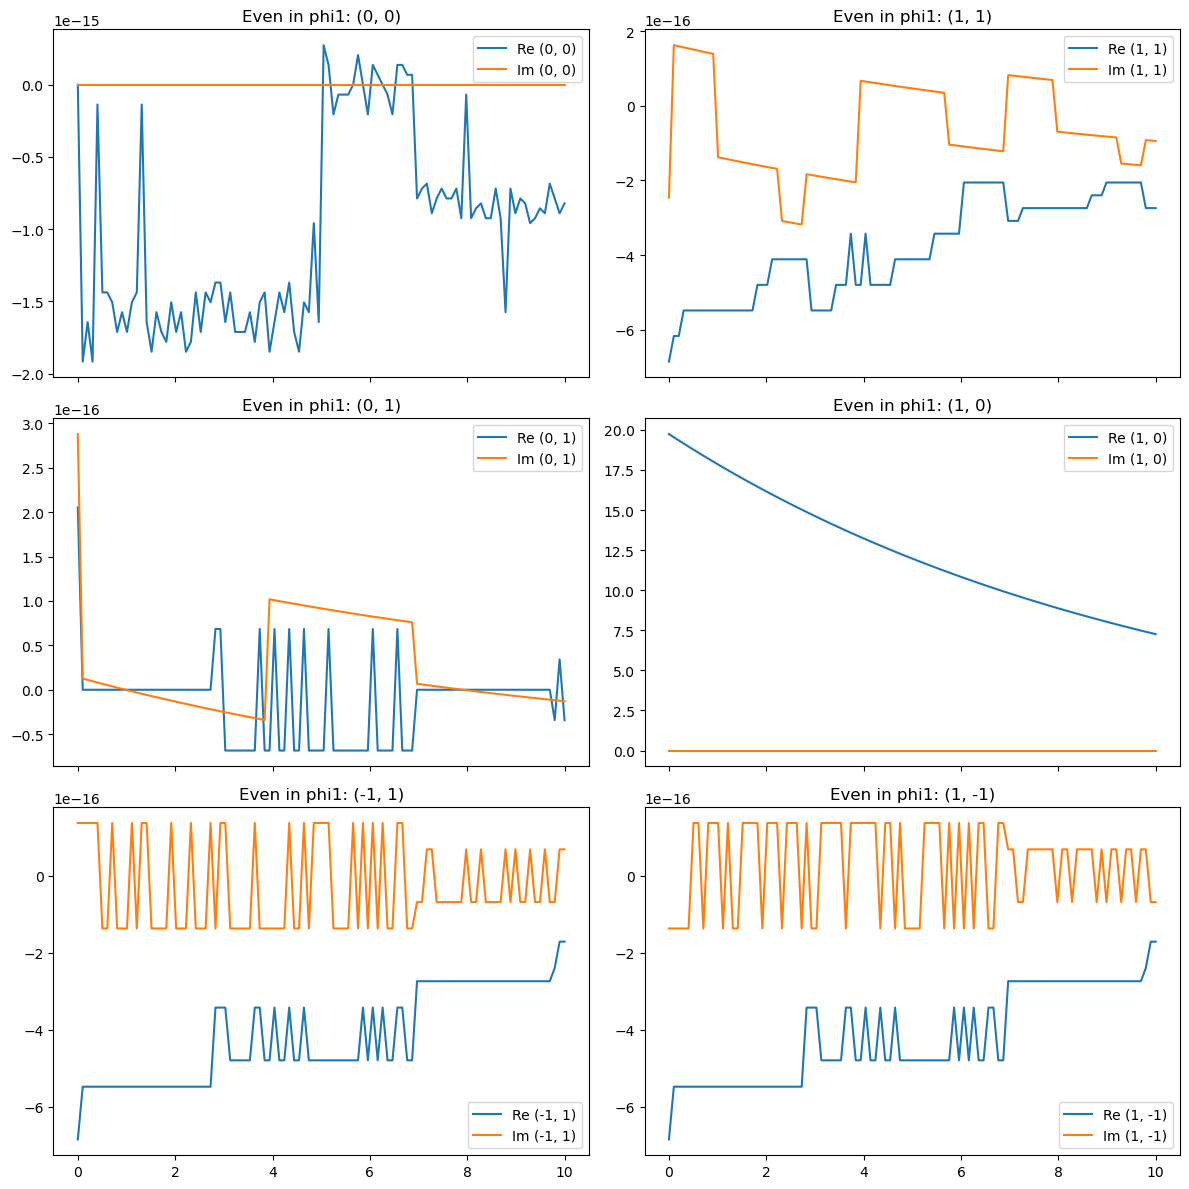

In [13]:
# Test Even in phi1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Even in phi1: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Odd in phi1: f(phi1, phi2) = -f(-phi1, phi2)

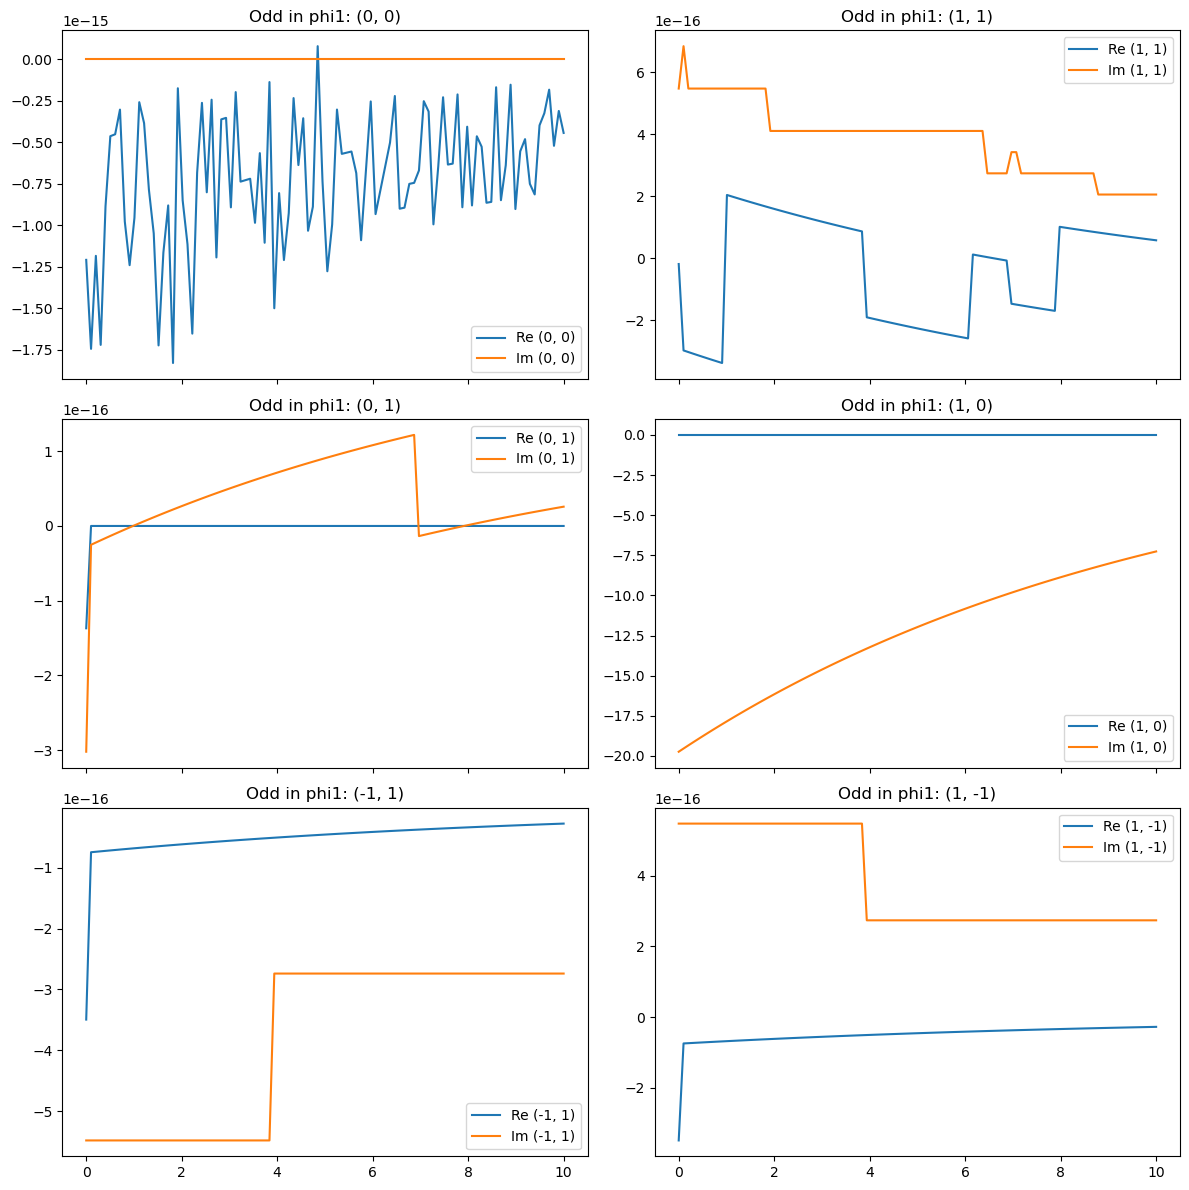

In [14]:
# Test Odd in phi1
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.sin(phi1) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Odd in phi1: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Even in phi2: f(phi1, phi2) = f(phi1, -phi2)

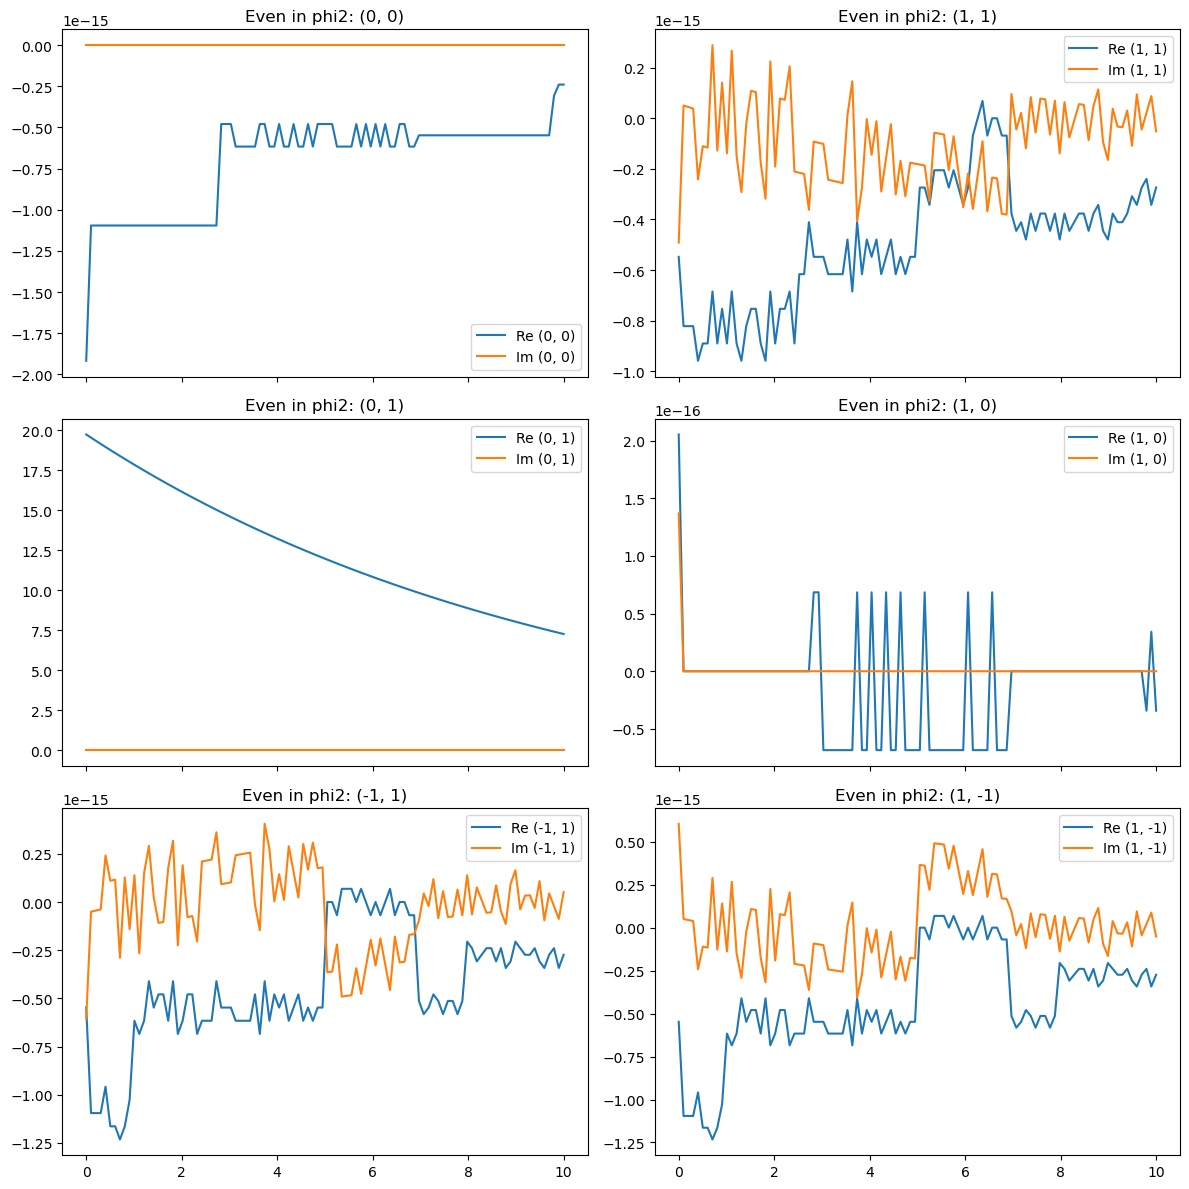

In [15]:
# Test Even in phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Even in phi2: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Odd in phi2: f(phi1, phi2) = -f(phi1, -phi2)

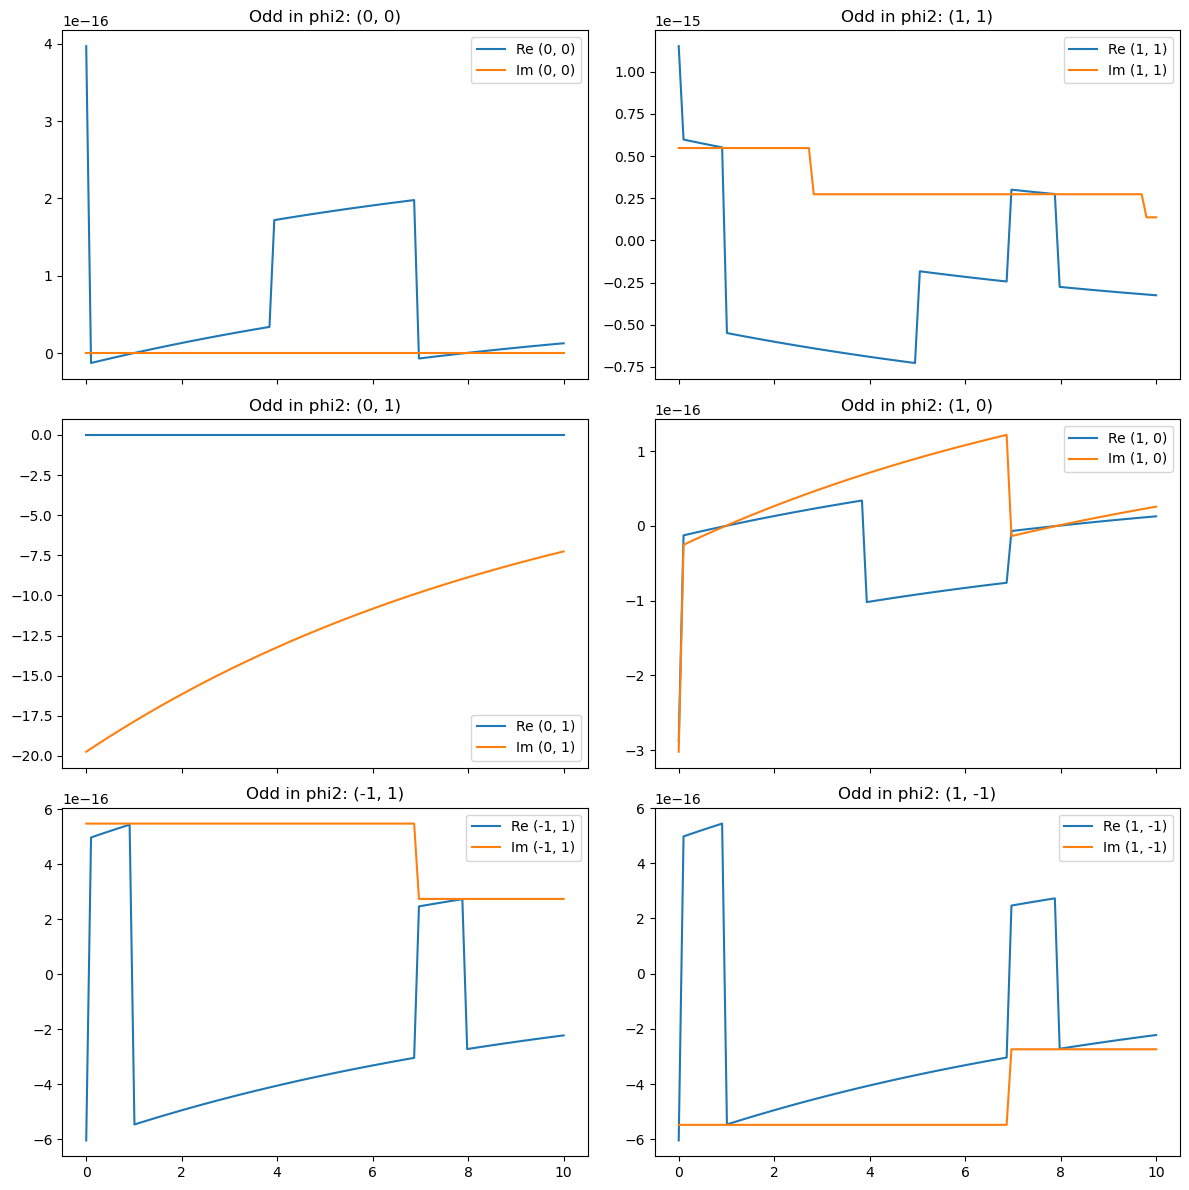

In [16]:
# Test Odd in phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.sin(phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Odd in phi2: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Even in both phi1 and phi2: f(phi1, phi2) = f(-phi1, -phi2)

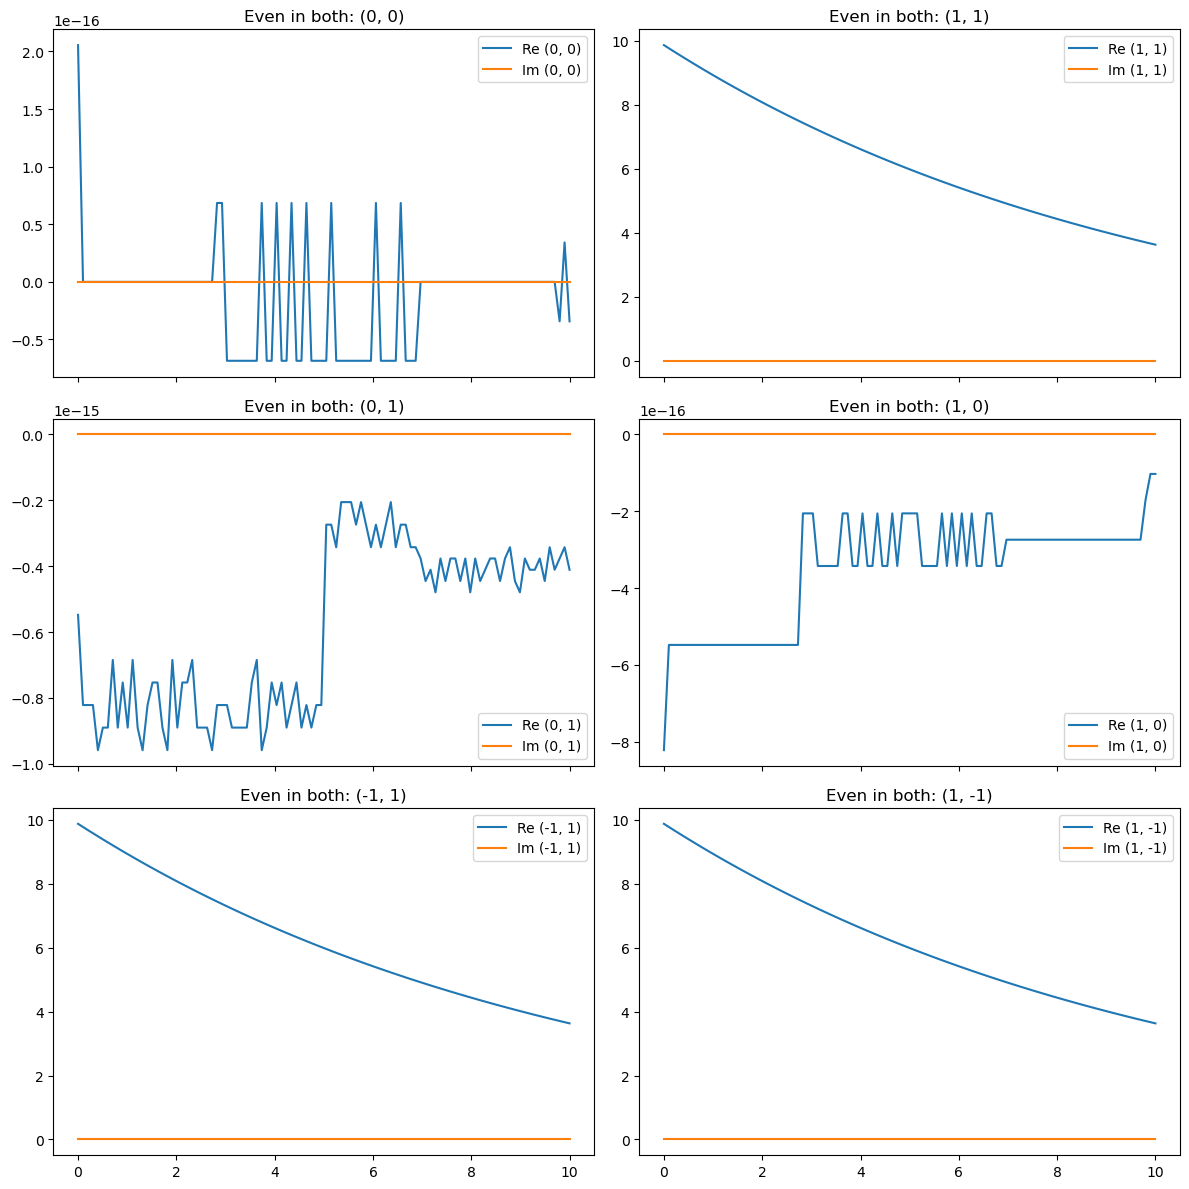

In [17]:
# Test Even in both phi1 and phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1) * np.cos(phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Even in both: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Odd in both phi1 and phi2: f(phi1, phi2) = -f(-phi1, -phi2)

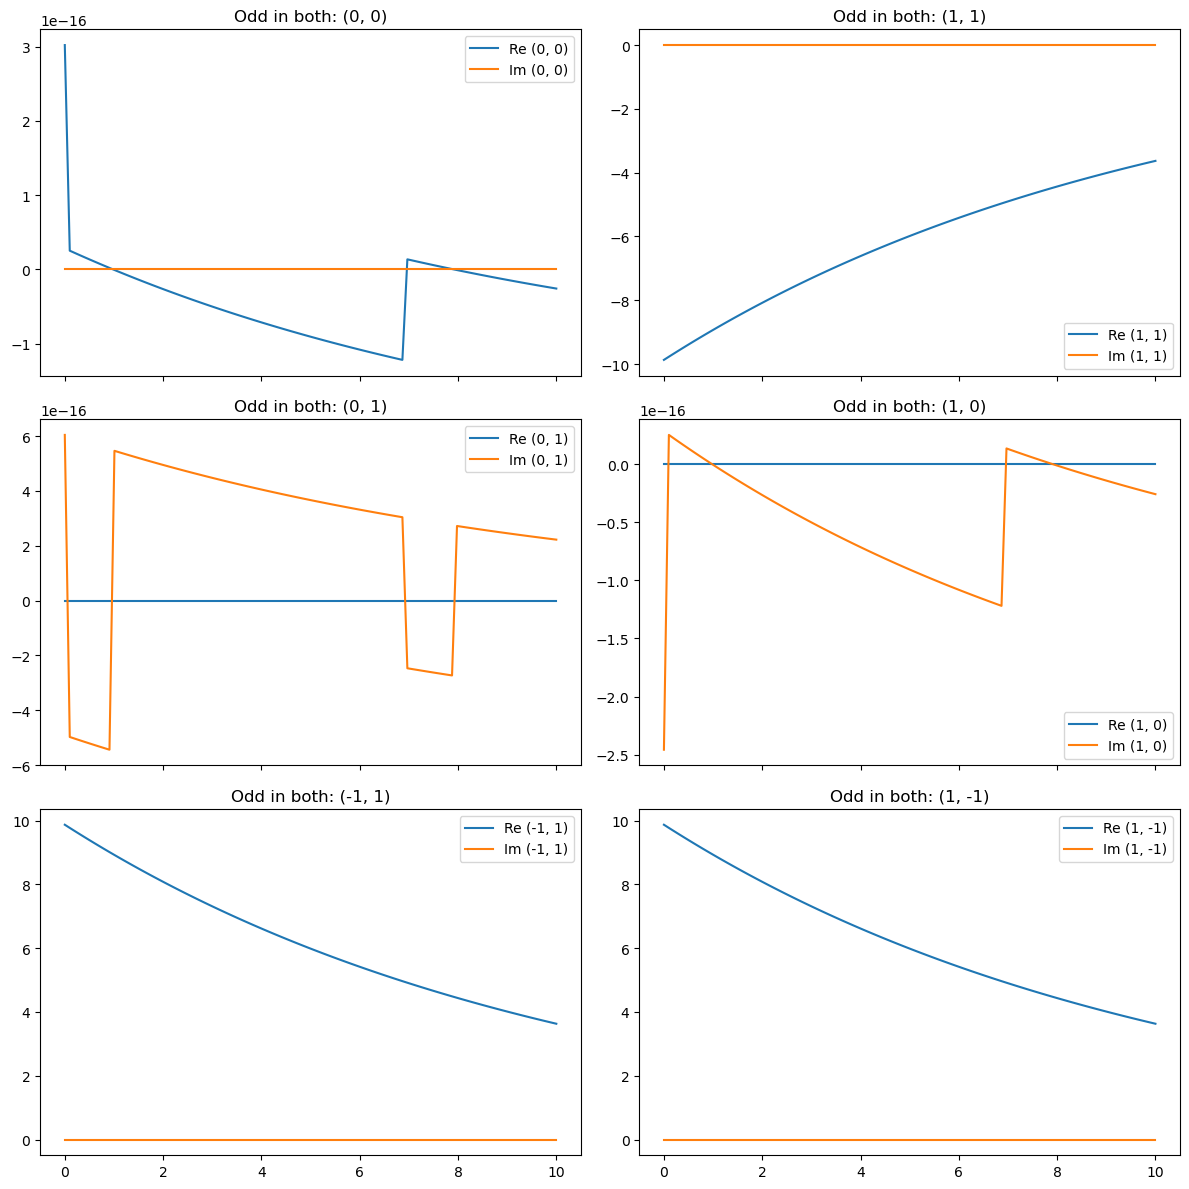

In [19]:
# Test Odd in both phi1 and phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.sin(phi1) * np.sin(phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Odd in both: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Symmetric under phi1 <-> phi2: f(phi1, phi2) = f(phi2, phi1)

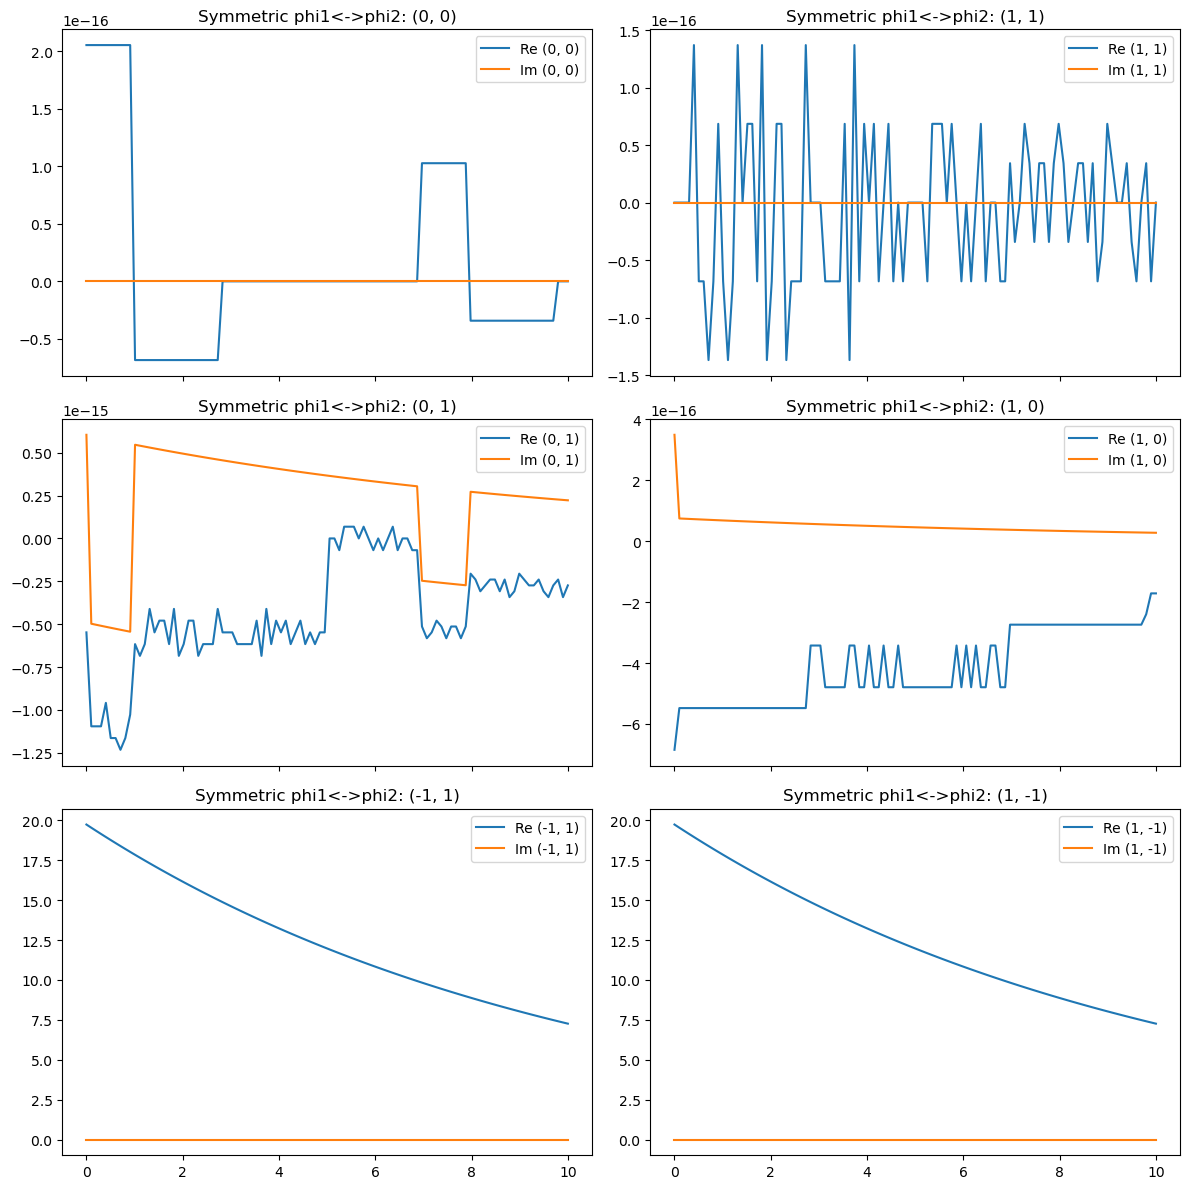

In [20]:
# Test Symmetric under phi1 <-> phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.cos(phi1 - phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Symmetric phi1<->phi2: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Antisymmetric under phi1 <-> phi2: f(phi1, phi2) = -f(phi2, phi1)

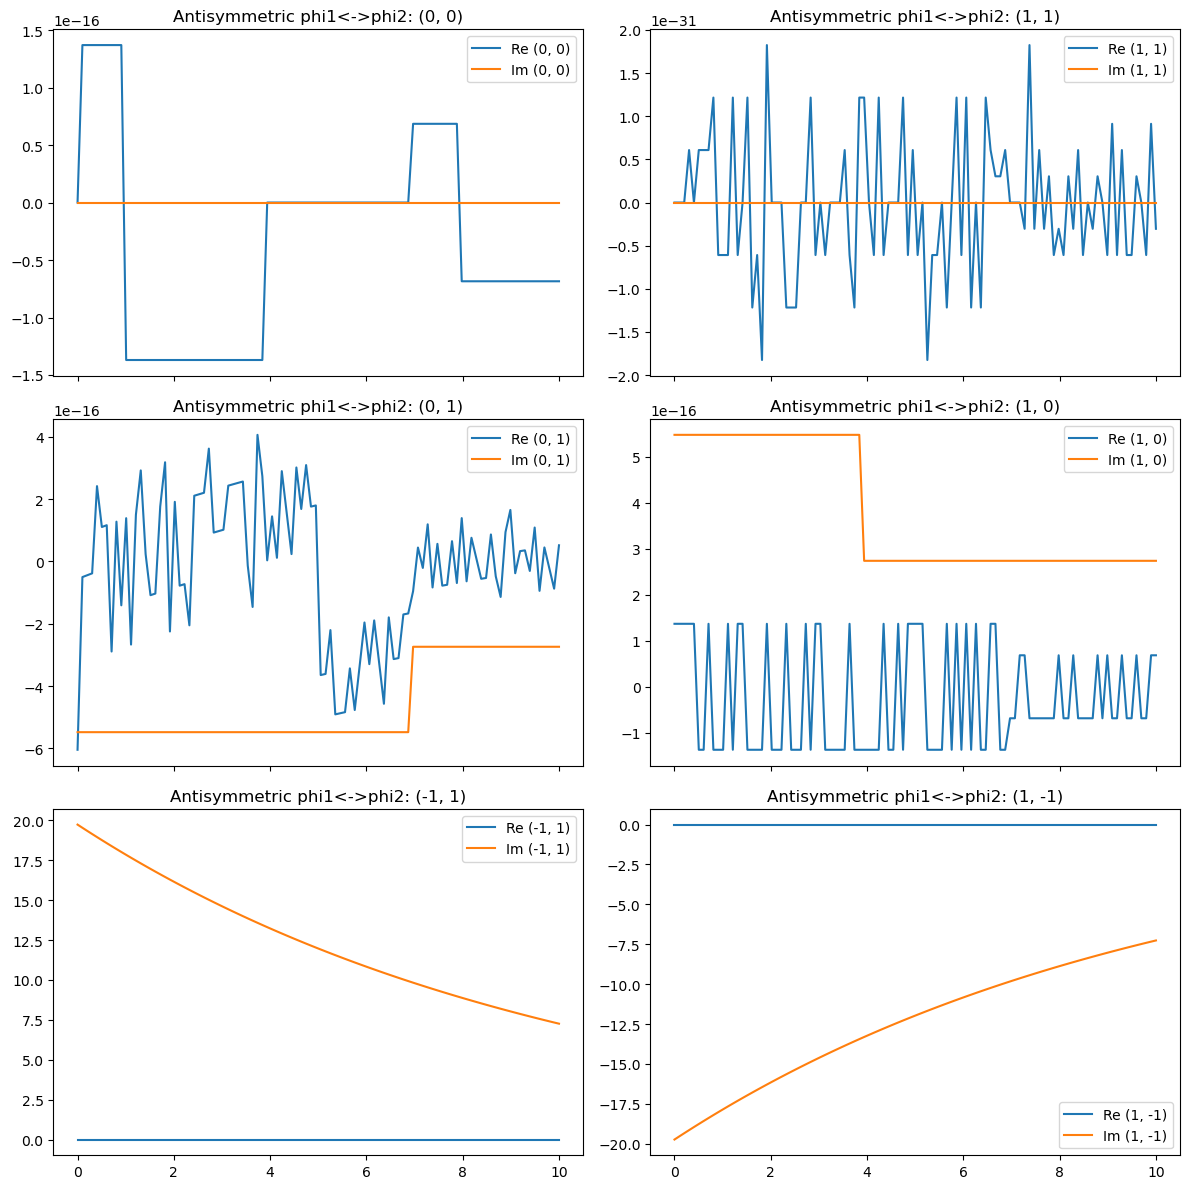

In [21]:
# Test Antisymmetric under phi1 <-> phi2
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.sin(phi1 - phi2) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Antisymmetric phi1<->phi2: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()

## Complex symmetry: f(phi1, phi2) = f(-phi1, phi2)* (conjugate)

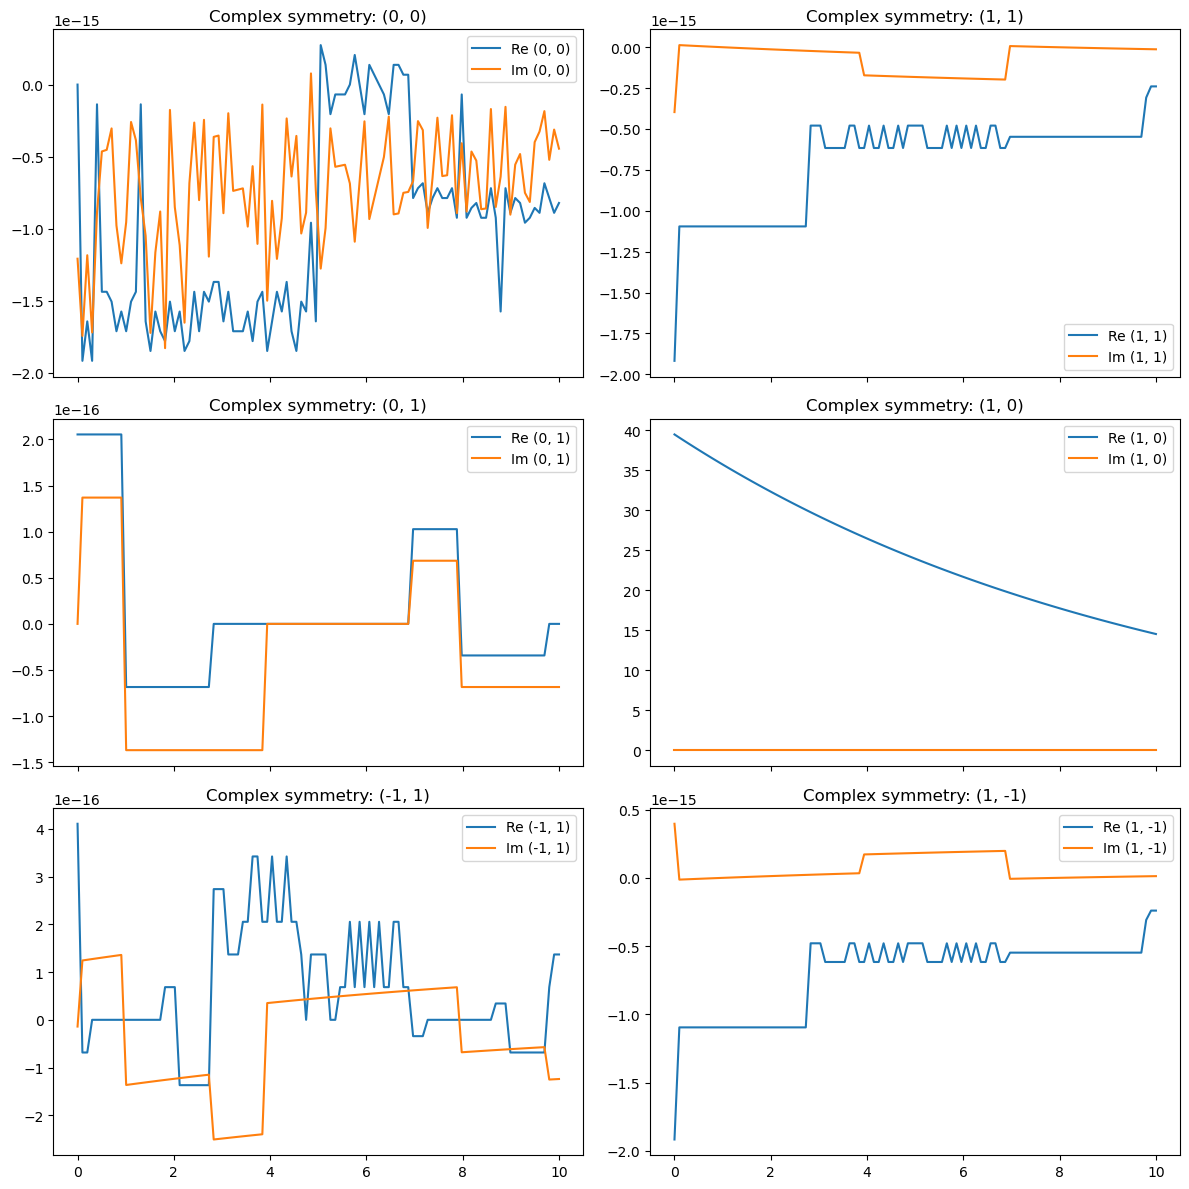

In [22]:
# Test Complex symmetry: f(phi1, phi2) = f(-phi1, phi2)*
P_grid = np.zeros((len(phases), len(phases), len(times)), dtype=complex)
gamma = 0.1
for i, phi1 in enumerate(phases):
    for k, phi2 in enumerate(phases):
        for t_idx, t in enumerate(times):
            P_grid[i, k, t_idx] = np.exp(1j * phi1) * np.exp(-gamma * t)

fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
for idx, lm in enumerate(lm_list):
    P_out = phase_cycle_component(phases, P_grid, lm=lm)
    ax = axes.flat[idx]
    ax.plot(times, np.real(P_out), label=f'Re {lm}')
    ax.plot(times, np.imag(P_out), label=f'Im {lm}')
    ax.set_title(f'Complex symmetry: {lm}')
    ax.legend()
plt.tight_layout()
plt.show()